In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (20, 15)


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTEENN
from sklearn.decomposition import IncrementalPCA
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb#

import pickle


import warnings
warnings.filterwarnings("ignore")


In [23]:
df = pd.read_csv("data/telco_basic_fe.csv", index_col=[0])




---
# Train Test Split
---

In [24]:
df

,churn,tenure,monthlycharges,totalcharges,gender_Male,seniorcitizen_yes,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_No phone service,...,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,tenure_group_2,tenure_group_3,tenure_group_4,tenure_group_5,tenure_group_6
0,0,1,29.85,29.85,0,0,1,0,0,1,...,0,1,0,1,0,0,0,0,0,0
1,0,34,56.95,1889.50,1,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
2,1,2,53.85,108.15,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
3,0,45,42.30,1840.75,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,1,2,70.70,151.65,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,0,1,1,1,0,...,0,1,0,0,1,1,0,0,0,0
7039,0,72,103.20,7362.90,0,0,1,1,1,0,...,0,1,1,0,0,0,0,0,0,1
7040,0,11,29.60,346.45,0,0,1,1,0,1,...,0,1,0,1,0,0,0,0,0,0
7041,1,4,74.40,306.60,1,1,1,0,1,0,...,0,1,0,0,1,0,0,0,0,0


In [25]:
X = df.iloc[:, 2:]
y= df.churn

X.shape, y.shape

((7043, 34), (7043,))

In [27]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.20, random_state=42)

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((5634, 34), (5634,), (1127, 34), (1127,), (282, 34), (282,))

## Models

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       823
           1       0.69      0.53      0.60       304

    accuracy                           0.81      1127
   macro avg       0.77      0.72      0.74      1127
weighted avg       0.80      0.81      0.80      1127

[[752  71]
 [144 160]]


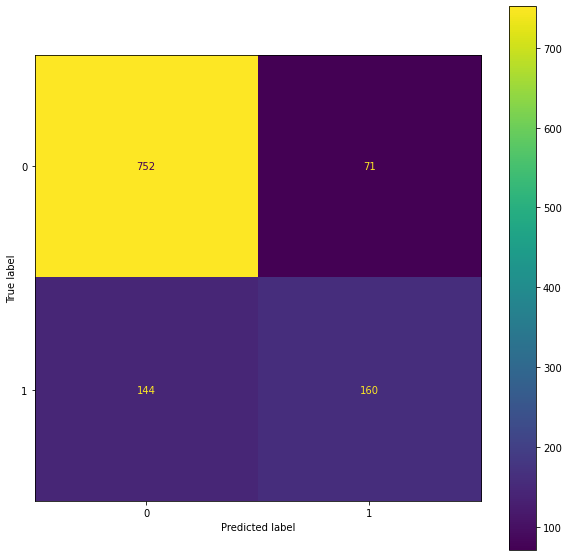

In [56]:
dt_model = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=6, min_samples_leaf=8)

dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_val)

dt_model.score(X_val, y_pred)

print(classification_report(y_val, y_pred))

print(confusion_matrix(y_val, y_pred))

__, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(dt_model, X_val, y_val, ax=ax);

## Balance the Dataset


In [67]:
sm = SMOTEENN()

X_resampled, y_resampled =sm.fit_resample(X,y)

In [78]:
y_resampled.value_counts()

1    3146
0    2673
Name: churn, dtype: int64

In [74]:
Xr_train, Xr_val, yr_train, yr_val = train_test_split(X_resampled, y_resampled, test_size=0.20, random_state=42)
Xr_val, Xr_test, yr_val, yr_test = train_test_split(Xr_val, yr_val, test_size=0.20, random_state=42)

Xr_train.shape, yr_train.shape, Xr_val.shape, yr_val.shape, Xr_test.shape, yr_test.shape

((4655, 34), (4655,), (931, 34), (931,), (233, 34), (233,))

## Modeling

### Decision Tree

1.0
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       446
           1       0.91      0.94      0.92       485

    accuracy                           0.92       931
   macro avg       0.92      0.92      0.92       931
weighted avg       0.92      0.92      0.92       931

[[399  47]
 [ 28 457]]


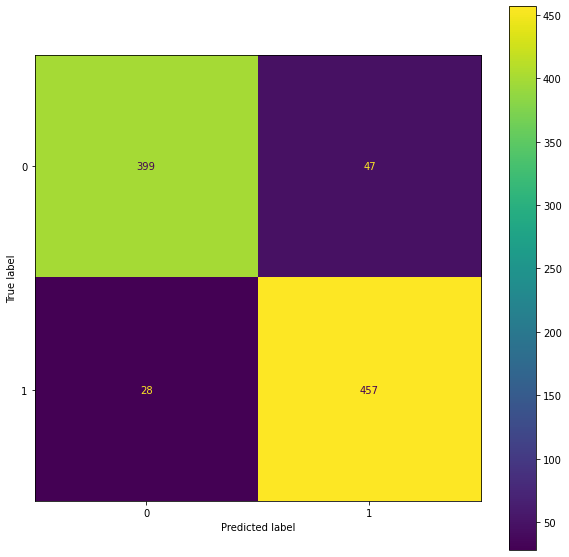

In [80]:
dt_model = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=6, min_samples_leaf=8)

dt_model.fit(Xr_train, yr_train)

y_pred = dt_model.predict(Xr_val)

print(dt_model.score(Xr_val, y_pred))

print(classification_report(yr_val, y_pred))

print(confusion_matrix(yr_val, y_pred))

__, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(dt_model, Xr_val, yr_val, ax=ax);

## Random Forrest

1.0
              precision    recall  f1-score   support

           0       0.94      0.89      0.92       446
           1       0.91      0.95      0.93       485

    accuracy                           0.92       931
   macro avg       0.92      0.92      0.92       931
weighted avg       0.92      0.92      0.92       931

[[399  47]
 [ 25 460]]


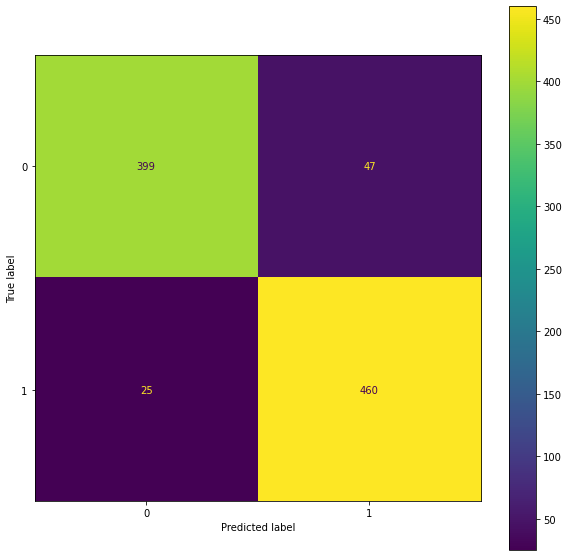

In [82]:
rt_model = RandomForestClassifier(n_estimators=100, criterion="gini", random_state=42, max_depth=6, min_samples_leaf=8)

rt_model.fit(Xr_train, yr_train)

y_pred = rt_model.predict(Xr_val)

print(rt_model.score(Xr_val, y_pred))

print(classification_report(yr_val, y_pred))

print(confusion_matrix(yr_val, y_pred))

__, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(rt_model, Xr_val, yr_val, ax=ax);

## GridSearch

In [84]:
param_grid = { 
    "n_estimators": [100, 200, 500],
    "criterion" :["gini", "entropy"],
    "max_features": ["auto", "sqrt", "log2"],
    "max_depth" : [4,5,6,7,8,10],
    "min_samples_leaf" : [4,6,8,10,12]
    
}

In [85]:
rfc = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
rf_grid.fit(Xr_train, yr_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [4, 6, 8, 10, 12],
                         'n_estimators': [100, 200, 500]})

In [87]:
best_params = rf_grid.best_params_
best_params

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'n_estimators': 500}

1.0
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       446
           1       0.92      0.96      0.94       485

    accuracy                           0.94       931
   macro avg       0.94      0.94      0.94       931
weighted avg       0.94      0.94      0.94       931

[[408  38]
 [ 18 467]]


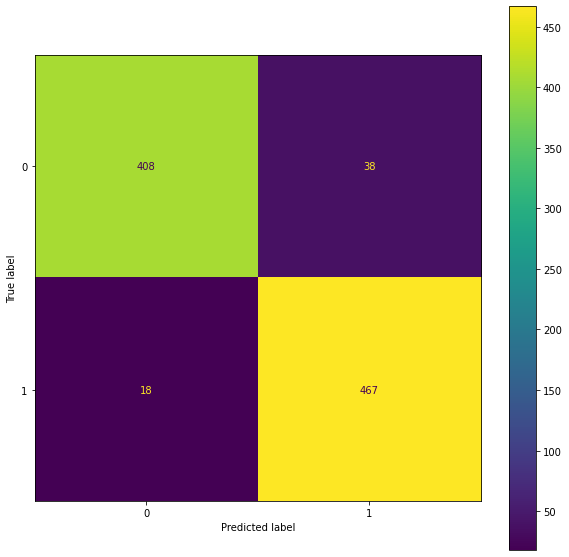

In [89]:
rt_model_gcv = RandomForestClassifier(random_state=42, criterion="entropy", max_depth=10, max_features="auto", min_samples_leaf=4, n_estimators=500)

rt_model_gcv.fit(Xr_train, yr_train)

y_pred = rt_model_gcv.predict(Xr_val)

print(rt_model_gcv.score(Xr_val, y_pred))

print(classification_report(yr_val, y_pred))
print(confusion_matrix(yr_val, y_pred))

__, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(rt_model_gcv, Xr_val, yr_val, ax=ax);

In [92]:
pickle.dump(rt_model_gcv, open("models/churn_rfc.sav", "wb"))